In [1]:
from keras.initializers import VarianceScaling
from keras.optimizers import Adam, Optimizer, SGD
from utils.dec import DEC
from utils.vgg16 import load_cifar10_vgg16
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
x,x_test,y,y_test = load_cifar10_vgg16()

In [3]:
x.shape

(50000, 512)

CIFAR-10 with VGG16

In [4]:
dims = [x.shape[-1], 500, 500, 2000, 10]

loss = 'mse'
optimizer = SGD(1., 0.9)
init = VarianceScaling(scale=1./3., mode='fan_in', distribution='uniform')
n_clusters=10

# DEC model
dec = DEC(dims=dims, n_clusters=n_clusters, initializer=init)
dec.compile(optimizer=optimizer, loss=loss)
dec.model.summary()

C:\Users\vioritiva\AppData\Roaming\Python\Python311\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Model: "model_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 512)]             0         
                                                                 
 encoder_0 (Dense)           (None, 500)               256500    
                                                                 
 encoder_1 (Dense)           (None, 500)               250500    
                                                                 
 encoder_2 (Dense)           (None, 2000)              1002000   
                                                                 
 encoder_3 (Dense)           (None, 10)                20010     
                                                                 
 clustering (ClusteringLaye  (None, 10)                100       
 r)                                                              
                                                         

In [5]:
init = 'glorot_uniform'
pretrain_optimizer = 'adam'
update_interval = 140
pretrain_epochs = 1000
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                            distribution='uniform')  # [-limit, limit], limit=sqrt(1./fan_in)
pretrain_optimizer = SGD(learning_rate=1., momentum=0.9)
dec.pretrain(x=x, optimizer=pretrain_optimizer,
                    epochs=pretrain_epochs,save_dir=None)
dec.compile(optimizer=SGD(0.01, 0.9), loss='kld')
dec.fit(x,
                update_interval=update_interval,
                save_dir=None)

Pretraining autoencoder model...
Epoch 1/500

196/196 [==============================] - 16s 60ms/step - loss: 0.0024
Epoch 2/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0022
Epoch 3/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0022
Epoch 4/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0022
Epoch 5/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0022
Epoch 6/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0022
Epoch 7/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0022
Epoch 8/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0022
Epoch 9/500
196/196 [==============================] - 11s 57ms/step - loss: 0.0022
Epoch 10/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0022
Epoch 11/500
196/196 [==============================] - 11s 58ms/step - loss: 0.0022
Epoch 12/500
196/196 [==================

array([5, 2, 4, ..., 9, 2, 2], dtype=int64)

In [26]:
y_pred = dec.predict(x)

In [7]:
#Creating a Mapping Between Predicted Labels and Clusters Based on Majority Labels within Each Cluster
relation = dict((x, 0) for x in range(n_clusters))
for i in range(n_clusters):
    u, indeces = np.unique(y_pred[y == i], return_inverse=True)
    i_pred = u[np.argmax(np.bincount(indeces))]
    relation[i_pred] = i

relation

{0: 0, 1: 0, 2: 9, 3: 0, 4: 0, 5: 7, 6: 0, 7: 0, 8: 0, 9: 0}

In [27]:
y_pred_corr = np.array(list(map(lambda x: relation[x], y_pred)))

In [28]:
print (y[:30])
print (y_pred_corr[:30])

[6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0]
[7 9 0 7 9 0 7 7 9 0 7 0 0 0 9 9 9 7 0 0 9 9 7 7 7 0 7 7 0 9]


In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred_corr)

0.09448

In [30]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(y, y_pred_corr)

0.13427317170203448

In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x, y_pred)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.049260564557841786


X_test

In [13]:
y_test = y_test.reshape(10000)
y_test.shape

(10000,)

In [14]:
y_pred_test = dec.predict(x_test)

In [15]:
#Creating a Mapping Between Predicted Labels and Clusters Based on Majority Labels within Each Cluster
relation = dict((x_test, 0) for x_test in range(n_clusters))
for i in range(n_clusters):
    u, indeces = np.unique(y_pred_test[y_test == i], return_inverse=True)
    i_pred = u[np.argmax(np.bincount(indeces))]
    relation[i_pred] = i
    
relation

{0: 0, 1: 0, 2: 9, 3: 0, 4: 0, 5: 7, 6: 0, 7: 0, 8: 0, 9: 0}

In [16]:
y_pred_corr_test = np.array(list(map(lambda x_test: relation[x_test], y_pred_test)))

In [17]:
print (y_test[:30])
print (y_pred_corr_test[:30])

[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6 7 0 4 9 5 2 4 0 9 6]
[0 9 0 9 7 7 0 7 7 0 9 9 7 7 9 7 0 0 9 7 0 9 7 9 0 7 7 0 0 7]


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_corr_test)

0.0998

In [19]:
from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(y_test, y_pred_corr_test)

0.14282197707618274

In [20]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(x_test, y_pred_test)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.056707778219448515


Visualization

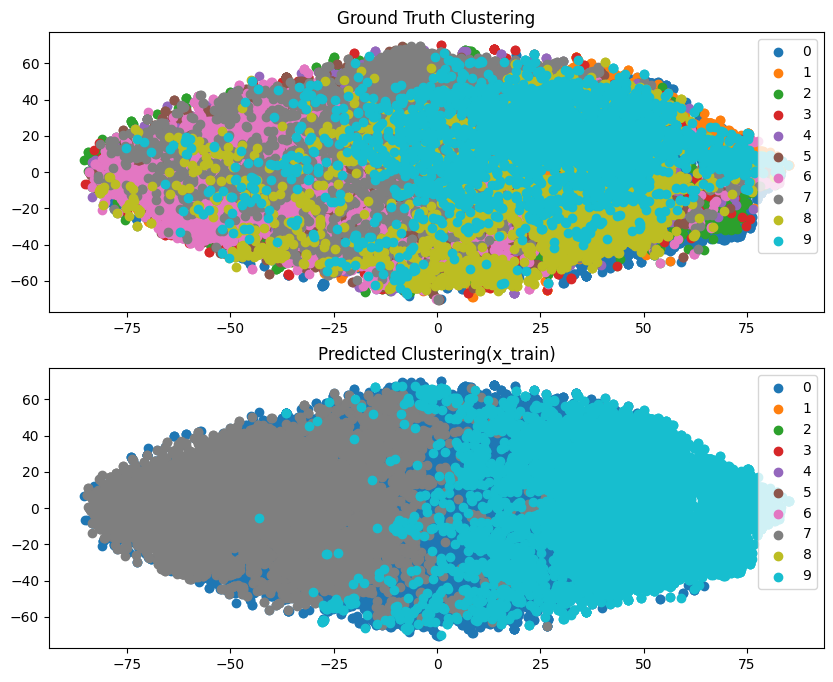

In [21]:
#x_train
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x)


plt.figure(figsize=(10, 8))

# Plot ground truth labels
plt.subplot(2, 1, 1)
for i in range(10):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], label=str(i))
plt.title('Ground Truth Clustering')
plt.legend()

# Plot predicted labels
plt.subplot(2, 1, 2)
for i in range(10):
    plt.scatter(X_tsne[y_pred_corr == i, 0], X_tsne[y_pred_corr == i, 1], label=str(i))
plt.title('Predicted Clustering(x_train)')
plt.legend()

plt.show()


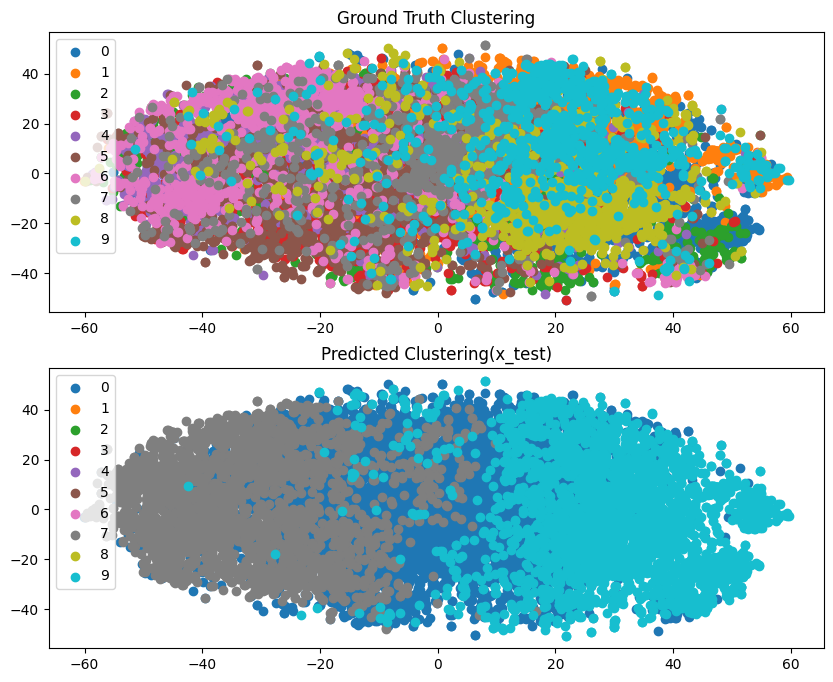

In [22]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x_test)

plt.figure(figsize=(10, 8))

# Plot ground truth labels
plt.subplot(2, 1, 1)
for i in range(10):
    plt.scatter(X_tsne[y_test == i, 0], X_tsne[y_test == i, 1], label=str(i))
plt.title('Ground Truth Clustering')
plt.legend()

# Plot predicted labels
plt.subplot(2, 1, 2)
for i in range(10):
    plt.scatter(X_tsne[y_pred_corr_test == i, 0], X_tsne[y_pred_corr_test == i, 1], label=str(i))
plt.title('Predicted Clustering(x_test)')
plt.legend()

plt.show()


In [23]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

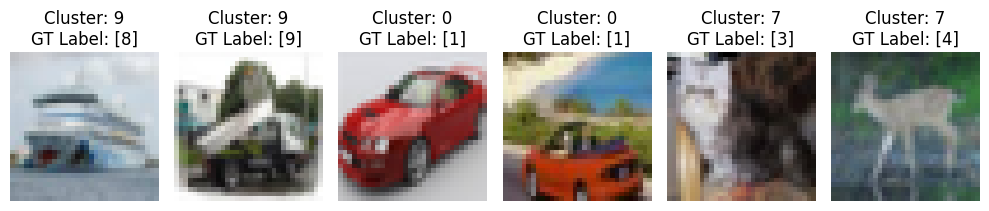

In [24]:

num_samples_to_visualize = 6
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(10, 2))

for i in range(num_samples_to_visualize):
    # Choose a random index
    idx = np.random.randint(0, len(x))
    
    img = x_train[idx]
    y_true = y_train[idx]
    
    predicted_cluster = y_pred_corr[idx]
    
    axes[i].imshow(img)
    axes[i].set_title(f"Cluster: {predicted_cluster}\nGT Label: {y_true}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

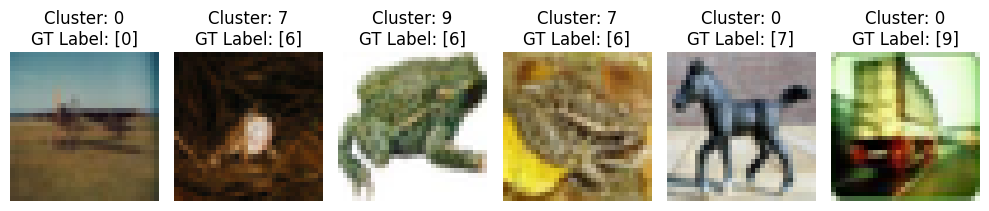

In [31]:

num_samples_to_visualize = 6
fig, axes = plt.subplots(1, num_samples_to_visualize, figsize=(10, 2))

for i in range(num_samples_to_visualize):
    # Choose a random index
    idx = np.random.randint(0, len(x_test))
    
    img = x_test[idx]
    y_true = y_test[idx]
    
    predicted_cluster = y_pred_corr_test[idx]
    
    axes[i].imshow(img)
    axes[i].set_title(f"Cluster: {predicted_cluster}\nGT Label: {y_true}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

CIFAR-10 with DBSCAN and VGG16

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(x)

# Evaluate the clustering performance using accuracy and NMI
y_pred = dbscan.labels_
relation = dict((x, 0) for x in range(10))
for i in range(10):
    u, indeces = np.unique(y_pred[y == i], return_inverse=True)
    i_pred = u[np.argmax(np.bincount(indeces))]
    relation[i_pred] = i
y_pred_test = np.array(list(map(lambda x: relation[x], y_pred)))
    
print('Accuracy:', accuracy_score(y, y_pred_test))
print('NMI:', normalized_mutual_info_score(y, y_pred_test))


In [5]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(x, y_pred_test)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.1470951723573715
